# ML Model

# 1) importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import requests
import pickle
import tqdm

In [3]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Regression evaluation
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

## 2)- Loading data-files

In [5]:
df = pd.read_csv('testset2.csv')

In [6]:
df.head(2)

,Unnamed: 0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25
0,0,0.572565,-0.014704,-0.352985,-0.012697,-0.138549,0.620313,-0.602656,-0.071517,-0.131941,...,-0.199931,-0.360027,0.154202,0.369976,0.320812,1.252255,1.154858,0.609724,-0.126952,0.075709
1,1,-1.233754,0.643106,-0.268247,-0.588117,-0.231391,1.816856,0.369814,0.784052,0.870746,...,0.943058,-0.475841,-0.085267,-0.601490,-0.601191,0.635048,-0.433662,-0.456993,0.429443,0.423808


In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.shape

(80000, 25)

In [9]:
# Selecting all columns except last one that is 'm25'.

X = df.iloc[:,:-1].values          
y = df['m25'].values

In [10]:
X

array([[ 0.57256488, -0.01470396, -0.35298469, ...,  1.1548579 ,
         0.60972403, -0.12695157],
       [-1.23375423,  0.64310596, -0.26824732, ..., -0.4336621 ,
        -0.4569929 ,  0.42944315],
       [-0.77836448, -0.45371563, -2.10020124, ...,  0.18666614,
         0.21163226, -0.56662082],
       ...,
       [ 0.94546444, -0.39535052,  0.3145296 , ..., -0.98010944,
         0.17685301, -0.17008695],
       [ 0.1151475 , -1.04815064,  0.65888561, ...,  1.15475919,
         1.25093225,  1.49547161],
       [ 0.31239622,  0.75315802,  0.94000431, ..., -0.16357309,
         1.71373922,  0.2796558 ]])

In [11]:
X.shape

(80000, 24)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2019)

# 3)- Baseline Model

In [13]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred = clf_lr.predict(X_test)

In [15]:
y_pred[:5]

array([ 0.10972659,  0.13205332,  0.03730852, -0.11999982, -0.0522195 ])

In [16]:
y_test

array([ 0.07428443, -0.11529221, -0.16358595, ..., -0.21487617,
        1.55000898,  0.99852831])

In [17]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

In [19]:
print('MSE    : %0.4f ' % mse)
print('MAE    : %0.4f ' % mae)
print('RMSE   : %0.4f ' % rmse)
print('R2     : %0.4f ' % r2)

MSE    : 0.8200 
MAE    : 0.7225 
RMSE   : 0.9055 
R2     : 0.0113 


### Using statsmodel

In [59]:
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLS
X = np.append(arr=np.ones((80000, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     39.44
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          2.85e-183
Time:                        20:26:04   Log-Likelihood:            -1.0535e+05
No. Observations:               80000   AIC:                         2.108e+05
Df Residuals:                   79975   BIC:                         2.110e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0050      0.003     -1.567      0.117      -0.011       0.001
x1             0.0004      0.004      0.101      0.920      -0.007       0.007
x2            -0.0004      0.004     -0.101      0.920      -0.007       0.007
x3            -0.0019      0.004     -0.544      0.587      -0.009       0.005
x4            -0.0026      0.004     -0.724      0.469      -0.010       0.004
x5             0.0016      0.004      0.440      0.660      -0.005       0.009
x6             0.0057      0.004      1.594      0.111      -0.001       0.013
x7             0.0017      0.004      0.467      0.640      -0.005       0.009
x8             0.0004      0.004      0.111      0.912      -0.007       0.007
x9            -0.0002      0.004     -0.070      0.944      -0.007       0.007
x10            0.0049      0.004      1.376      0.169      -0.002       0.012
x11            0.0002      0.004      0.044      0.965      -0.007       0.007
x12            0.0019      0.004      0.540      0.589      -0.005       0.009
x13            0.0130      0.004      3.665      0.000       0.006       0.020
x14            0.0086      0.004      2.433      0.015       0.002       0.016
x15            0.0107      0.004      2.995      0.003       0.004       0.018
x16            0.0234      0.004      6.575      0.000       0.016       0.030
x17            0.0171      0.004      4.819      0.000       0.010       0.024
x18            0.0192      0.004      5.393      0.000       0.012       0.026
x19            0.0135      0.004      3.773      0.000       0.006       0.020
x20            0.0158      0.004      4.441      0.000       0.009       0.023
x21            0.0148      0.004      4.176      0.000       0.008       0.022
x22            0.0432      0.004     12.186      0.000       0.036       0.050
x23            0.0487      0.004     13.743      0.000       0.042       0.056
x24            0.0505      0.004     14.222      0.000       0.043       0.057
==============================================================================
Omnibus:                        3.558   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.589
Skew:                          -0.008   Prob(JB):                        0.166
Kurtosis:                       3.028   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4)- Machine Learning Models

- Improved Linear regression models

1.Ridge regression

2.Lasso regression

- Support Vector Machine

3.Support vector regression

- Nearest neighbour Regressor

4.KNeighborsRegressor

- Ensmble models

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

- Neural Network

8.Multi Layer Preceptron Regressor

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [21]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [22]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 2019
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [23]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.03125333786010742,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': -6.5078971853704815e-06,
  'Test_RMSE_Score': 0.9107034305093398},
 {'Name': 'Ridge: ',
  'Train_Time': 0.01562666893005371,
  'Train_R2_Score': 0.01170557680939055,
  'Test_R2_Score': 0.011325215625215046,
  'Test_RMSE_Score': 0.9055288434294338},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.10938429832458496,
  'Train_R2_Score': 0.20551081274433436,
  'Test_R2_Score': -0.1832041080913338,
  'Test_RMSE_Score': 0.9906161266836798},
 {'Name': 'SVR:',
  'Train_Time': 513.1625337600708,
  'Train_R2_Score': 0.14043237941262265,
  'Test_R2_Score': -0.029968716835653053,
  'Test_RMSE_Score': 0.9242459930086262},
 {'Name': 'RandomForest ',
  'Train_Time': 16.240084171295166,
  'Train_R2_Score': 0.8029327723945692,
  'Test_R2_Score': -0.09698992987404953,
  'Test_RMSE_Score': 0.9538429624422137},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 3.672743797302246,
  'Train_R2_Score': 0

In [24]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [25]:
df

,Name,Test_R2_Score,Test_RMSE_Score,Train_R2_Score,Train_Time
0,Lasso:,-0.000007,0.910703,0.000000,0.031253
1,Ridge:,0.011325,0.905529,0.011706,0.015627
2,KNeighborsRegressor:,-0.183204,0.990616,0.205511,0.109384
3,SVR:,-0.029969,0.924246,0.140432,513.162534
4,RandomForest,-0.096990,0.953843,0.802933,16.240084
5,ExtraTreeRegressor :,-0.096786,0.953754,1.000000,3.672744
6,GradientBoostingClassifier:,0.008646,0.906755,0.027097,13.015487
7,XGBRegressor:,0.008839,0.906667,0.026870,11.455181
8,MLPRegressor:,0.004233,0.908771,0.012703,4.997226


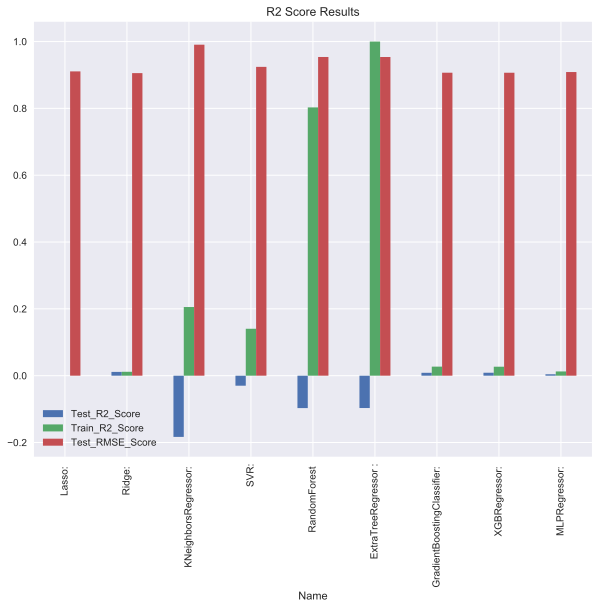

In [26]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# 5)- Parameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 30.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=40, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [80, 150, 200, 250], 'n_estimators': [100, 150, 200, 250], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [28]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [29]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=80,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
          oob_score=False, random_state=40, verbose=0, warm_start=False)

In [30]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(X_train,y_train)

0.999999999999834

In [31]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_test,y_test)

0.004829095381255977

In [32]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.908498876292204

# 6)-Feature importance

In [33]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [39]:
X_train.shape

(64000, 24)

In [41]:
X_train[0]

array([ 0.43054249,  0.36033825, -1.02078563, -0.98150799, -0.67151722,
        0.59656716, -0.87100737, -0.19444989,  0.05127929, -0.88828897,
        0.88187234, -1.32688333, -0.46304603,  1.28519583,  0.08753225,
        0.61803863,  1.12503518, -0.10717492,  0.94751249, -1.41873937,
        0.24135881, -0.42888049, -0.39056947,  1.59243603])

In [44]:
X_train_pd=pd.DataFrame({'Column1': X_train[:, 0], 'Column2': X_train[:, 1],'Column3': X_train[:, 2],'Column4': X_train[:, 3],
                        'Column5': X_train[:, 4],'Column6': X_train[:, 5],'Column7': X_train[:, 6],'Column8': X_train[:, 7],
                        'Column9': X_train[:, 8],'Column10': X_train[:, 9],'Column11': X_train[:, 10],'Column12': X_train[:, 11],
                        'Column13': X_train[:, 12],'Column14': X_train[:, 13],'Column15': X_train[:, 14],'Column16': X_train[:, 15],
                        'Column17': X_train[:, 16],'Column18': X_train[:, 17],'Column19': X_train[:, 18],'Column20': X_train[:, 19],
                        'Column21': X_train[:, 20],'Column22': X_train[:, 21],'Column23': X_train[:, 22],'Column24': X_train[:, 23]})

In [45]:
X_train_pd.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24
0,0.430542,0.360338,-1.020786,-0.981508,-0.671517,0.596567,-0.871007,-0.194450,0.051279,-0.888289,...,0.087532,0.618039,1.125035,-0.107175,0.947512,-1.418739,0.241359,-0.428880,-0.390569,1.592436
1,0.425870,-0.626355,0.086012,-1.079379,-1.787350,0.717679,-0.010932,0.244933,0.877482,0.656377,...,-0.165664,-1.931940,1.441454,-0.109042,-0.054011,1.057128,0.638581,-0.867792,-1.472707,1.219919
2,-1.667825,1.212144,0.507819,-0.524432,0.658143,1.418835,-0.451725,-0.349694,-1.108891,0.229140,...,0.162123,-0.074791,0.851576,1.223488,-3.012793,-0.897328,-0.318870,1.868368,-0.924105,-0.202585
3,0.574757,-1.654191,-0.172460,-0.820942,-0.299037,0.876213,0.394898,-1.606240,-0.719465,0.555925,...,1.202496,0.014416,-0.795515,1.261078,-0.954240,0.315021,2.641701,-0.397598,-1.515542,0.082684
4,-0.922545,2.123486,-1.414699,-0.278264,0.243903,0.069979,-1.105236,0.524039,-1.060330,-1.194825,...,0.440082,-0.350586,-1.240070,-0.800463,-1.052528,1.595918,-0.307986,-1.154266,0.212120,-0.271481


In [53]:
X_train_pd.shape

(64000, 24)

In [54]:
X_test_pd=pd.DataFrame({'Column1': X_test[:, 0], 'Column2': X_test[:, 1],'Column3': X_test[:, 2],'Column4': X_test[:, 3],
                        'Column5': X_test[:, 4],'Column6': X_test[:, 5],'Column7': X_test[:, 6],'Column8': X_test[:, 7],
                        'Column9': X_test[:, 8],'Column10': X_test[:, 9],'Column11': X_test[:, 10],'Column12': X_test[:, 11],
                        'Column13': X_test[:, 12],'Column14': X_test[:, 13],'Column15': X_test[:, 14],'Column16': X_test[:, 15],
                        'Column17': X_test[:, 16],'Column18': X_test[:, 17],'Column19': X_test[:, 18],'Column20': X_test[:, 19],
                        'Column21': X_test[:, 20],'Column22': X_test[:, 21],'Column23': X_test[:, 22],'Column24': X_test[:, 23]})

In [55]:
X_test_pd.shape

(16000, 24)

In [46]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_pd.columns[i] for i in indices]

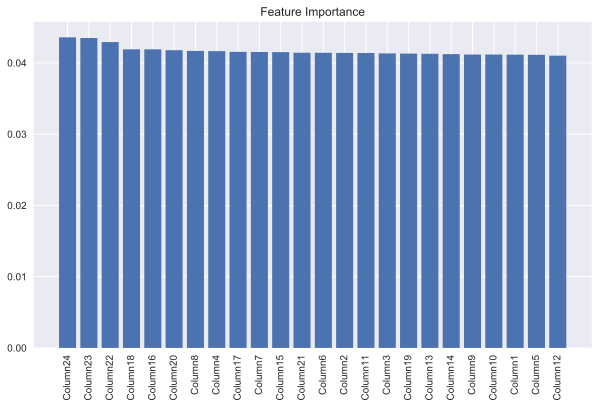

In [52]:
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train_pd.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train_pd.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [48]:
# Get top 5 most important feature 
names[0:5]

['Column24', 'Column23', 'Column22', 'Column18', 'Column16']

In [49]:
# Get 5 least important feature 
names[-5:]

['Column9', 'Column10', 'Column1', 'Column5', 'Column12']

In [56]:
# Reduce test & training set to 5 feature set
train_important_feature = X_train_pd[names[0:5]]
test_important_feature = X_test_pd[names[0:5]]

In [57]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=80,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
          oob_score=False, random_state=40, verbose=0, warm_start=False)

In [58]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(y_train,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(y_test,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999999999994547
Testing set R2 Score -  -0.02189816942215228
Testing set RMSE Score -  0.9206178048357346


Our Baseline model gave us:
    
- MSE    : 0.8200 
- MAE    : 0.7225 
- RMSE   : 0.9055 
- R2     : 0.0113 

**The best R2 is from above machine learning is 0.011325 . That was model named "Ridge Regression".Hence, we may conclude that OLS Regression seems to be the most optimized model for our prediction problem.**